In [2]:
import nibabel as nib
import numpy as np 
import nilearn.plotting as niplt 
import matplotlib.pyplot as plt 
%matplotlib inline
import os 

In [17]:
d="/jukebox/griffiths/bert-brains/results/difference_maps/"
def view_comparison_maps(model,dataset,threshold=0.95,vmax=0):
    if model=='bert-base-uncased':
        names=[dataset+"_"+x for x in ['bert_complexity_v_distance','bert_T20distance_v_T120distance','bert_l1_T20complexity_v_T120complexity','bert_5TRcomposition_v_20TRcomposition']]
    else: 
        names=[dataset+"_"+x for x in ['gpt_complexity_v_distance','gpt_T20distance_v_T120distance','gpt_l1_T20complexity_v_T120complexity','gpt_5TRcomposition_v_20TRcomposition']]
    for name in names:
        fname=d+name 
        t_nii=nib.load(fname+"_tvalues.nii.gz")
        affine=t_nii.affine 
        t_volume=t_nii.get_fdata()
        if threshold>0:
            p_volume=nib.load(fname+"_pvalues.nii.gz").get_fdata()
            t_volume=t_volume*(p_volume>=threshold).astype('int')
        img=nib.Nifti1Image(t_volume,affine)
        if vmax>0:
            niplt.plot_glass_brain(img,title=name,colorbar=True,vmax=vmax)
        else:
            niplt.plot_glass_brain(img,title=name,colorbar=True)


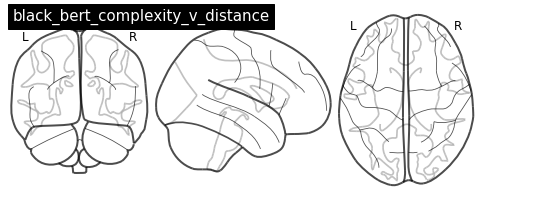

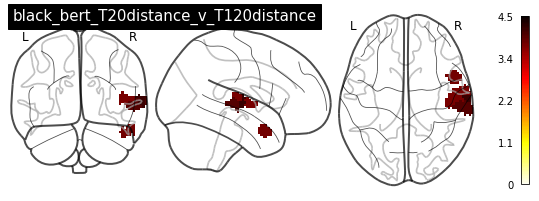

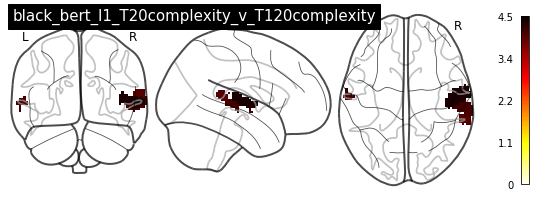

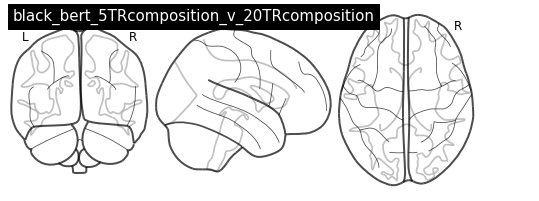

In [19]:
view_comparison_maps('bert-base-uncased','black',vmax=4.5)

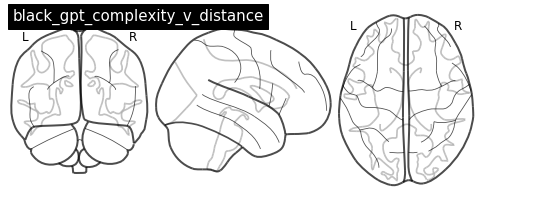

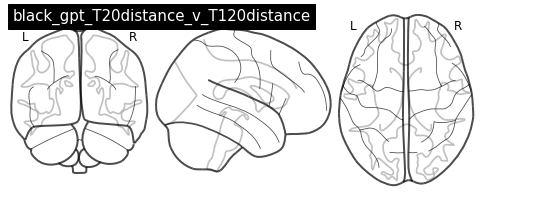

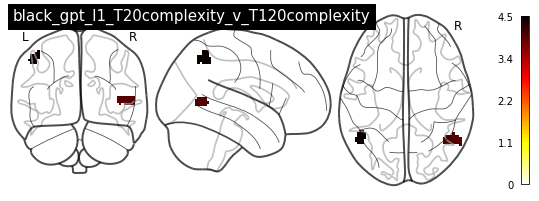

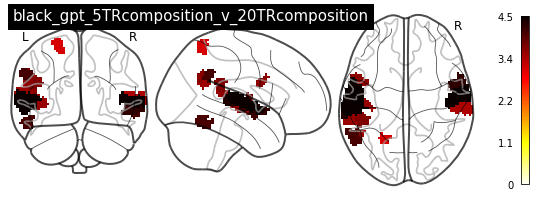

In [21]:
view_comparison_maps('gpt2','black',vmax=4.5)

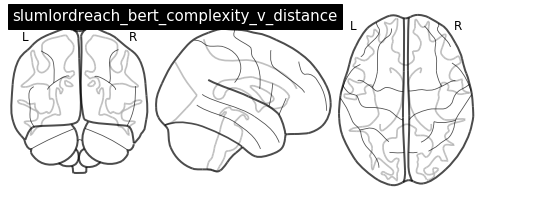

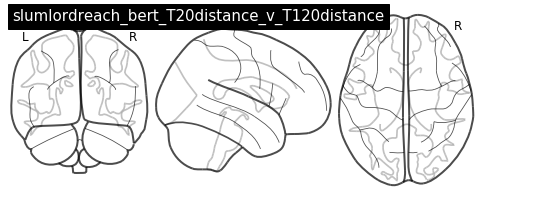

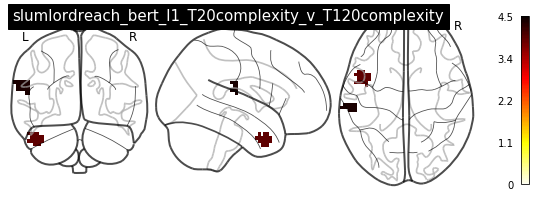

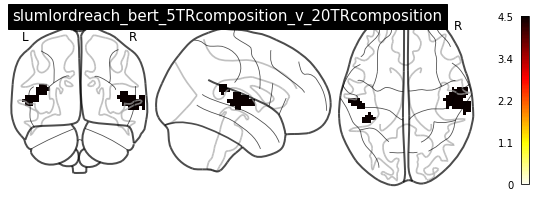

In [22]:
view_comparison_maps('bert-base-uncased','slumlordreach',vmax=4.5)

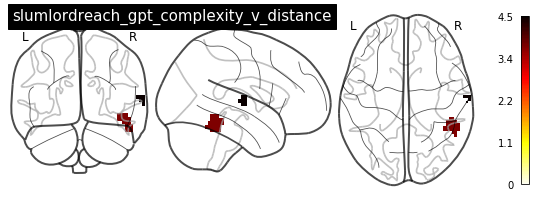

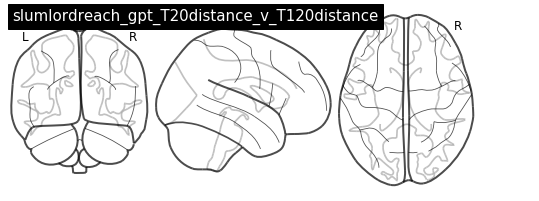

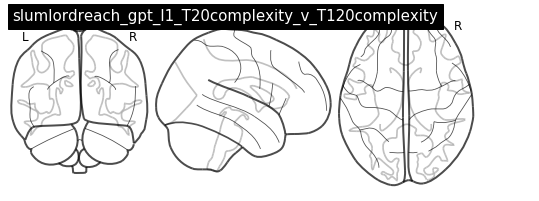

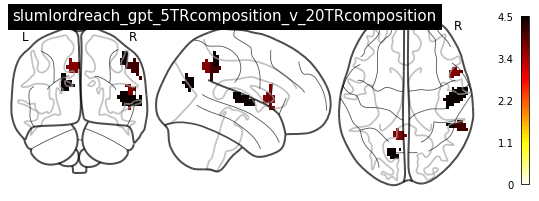

In [23]:
view_comparison_maps('gpt2','slumlordreach',vmax=4.5)